In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline
import os
import pylab
import numpy as np
import umap
import glob


In [2]:
sns.set(context='paper', style='darkgrid', rc={'figure.facecolor':'white'}, font_scale=2)

In [95]:
#get file names in directory that end in csv
os.chdir('/Users/s1249052/PhD/flow data/vac69a/t cells only/experiment_210618_files/csv_by_person/all')
os.getcwd()
filenames = glob.glob('*.csv')
print(filenames, len(filenames))


['baseline_02_UMAP.csv', 'baseline_03_UMAP.csv', 'baseline_05_UMAP.csv', 'baseline_06_UMAP.csv', 'baseline_07_UMAP.csv', 'baseline_09_UMAP.csv', 'C+10_02_UMAP.csv', 'C+10_03_UMAP.csv', 'C+10_05_UMAP.csv', 'C+10_06_UMAP.csv', 'C+10_07_UMAP.csv', 'C+10_09_UMAP.csv', 'C+12_02_UMAP.csv', 'C+12_03_UMAP.csv', 'C+12_05_UMAP.csv', 'C+12_06_UMAP.csv', 'C+12_07_UMAP.csv', 'C+12_09_UMAP.csv', 'DoD_02_UMAP.csv', 'DoD_03_UMAP.csv', 'DoD_05_UMAP.csv', 'DoD_06_UMAP.csv', 'DoD_07_UMAP.csv', 'DoD_09_UMAP.csv', 'T+6_02_UMAP.csv', 'T+6_03_UMAP.csv', 'T+6_05_UMAP.csv', 'T+6_06_UMAP.csv', 'T+6_07_UMAP.csv', 'T+6_09_UMAP.csv'] 30


In [96]:
big_boi = pd.DataFrame()

for n in filenames:
    file = pd.read_csv(n)
    file['id'] = '{}'.format(n)
    big_boi = big_boi.append([file], ignore_index=True, sort=False)


print(len(big_boi))
print(len(big_boi.columns))

977807
39


In [97]:
#print(big_boi.columns)
#print(len(big_boi.columns))
print(big_boi.iloc[:, 1:35].head(n=2))


   115In_CD57  141Pr_HLA-DR  142Nd_BCL-2  143Nd_CD45RA  144Nd_GZB  145Nd_CD4  \
0         0.0           0.0     4.687225      3.931365   0.000000    0.00000   
1         0.0           0.0     3.584899      3.505189   0.896894    5.45049   

   146Nd_Vd2  148Nd_ICOS  149Sm_CXCR5  150Nd_CD95     ...      167Er_CCR7  \
0   0.000000    0.000000          0.0     0.00000     ...        5.220753   
1   2.468887    1.956988          0.0     0.90938     ...        4.308445   

   168Er_CD127  169Tm_CD38  171Yb_CD49d  172Yb_CD25  173Yb_CD39  174Yb_CLA  \
0     4.078405    3.126917     3.486562    1.887629    1.316506   2.603347   
1     3.855416    5.087446     2.033088    0.870406    0.000000   0.279724   

   175Lu_Perforin  198Pt_CD8  209Bi_CD16  
0        1.417754   4.724484    0.000000  
1        0.000000   0.697346    0.464288  

[2 rows x 34 columns]


CPU times: user 1h 46min 2s, sys: 2min 52s, total: 1h 48min 54s
Wall time: 57min 6s


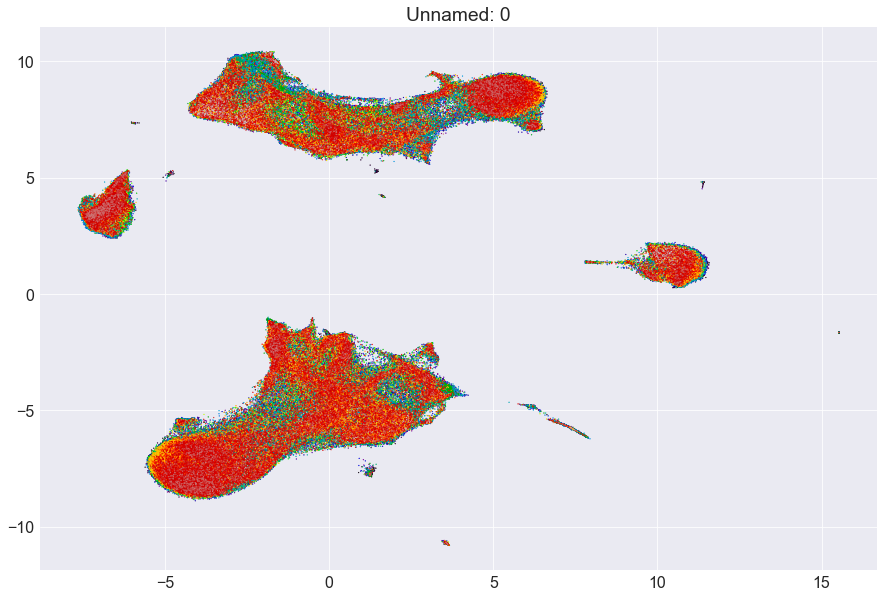

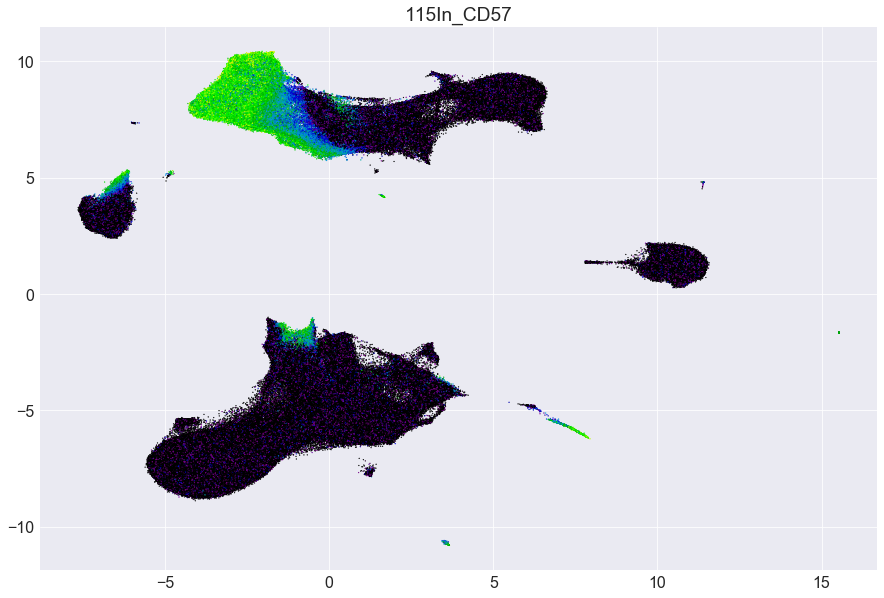

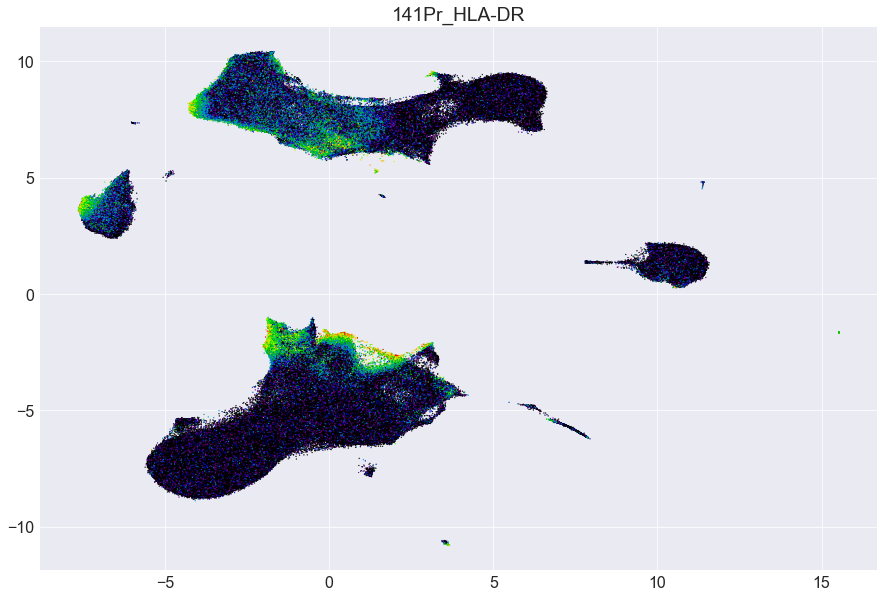

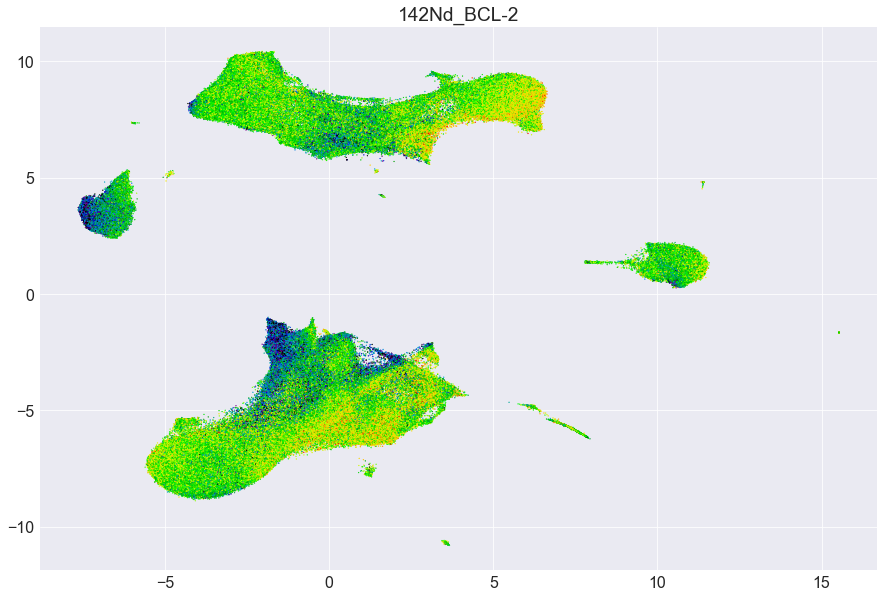

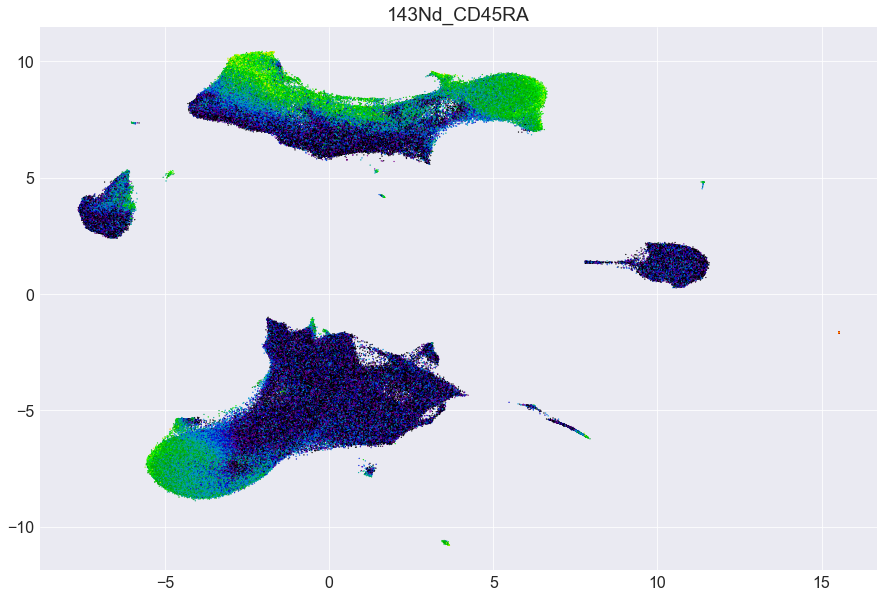

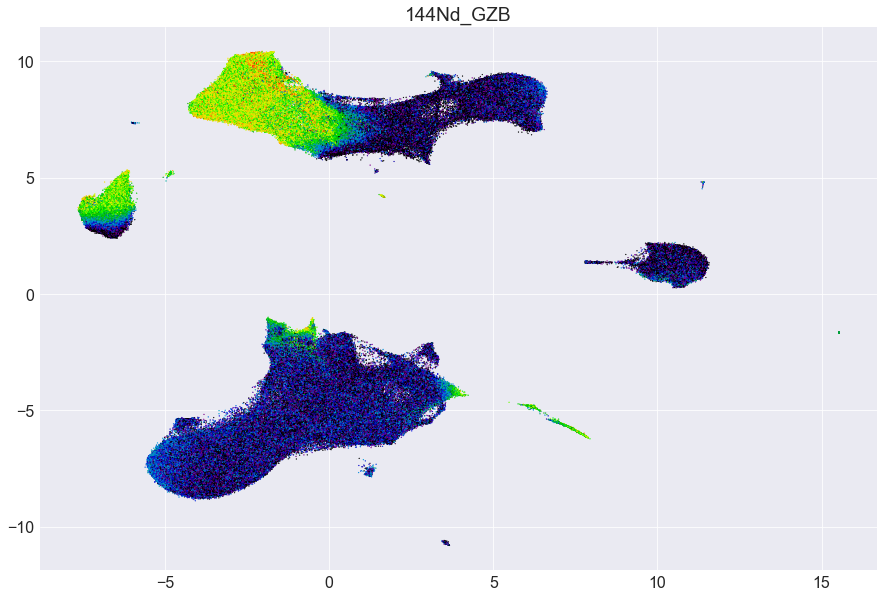

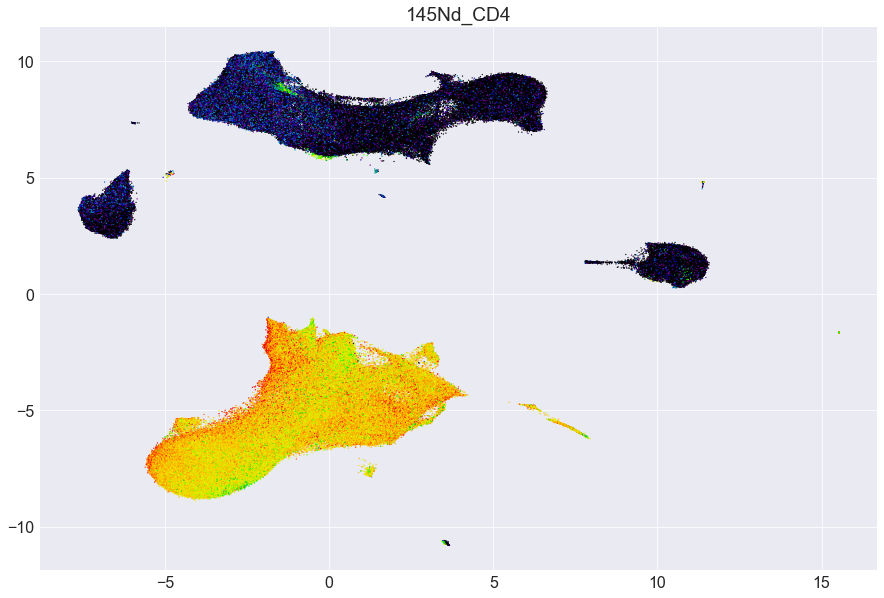

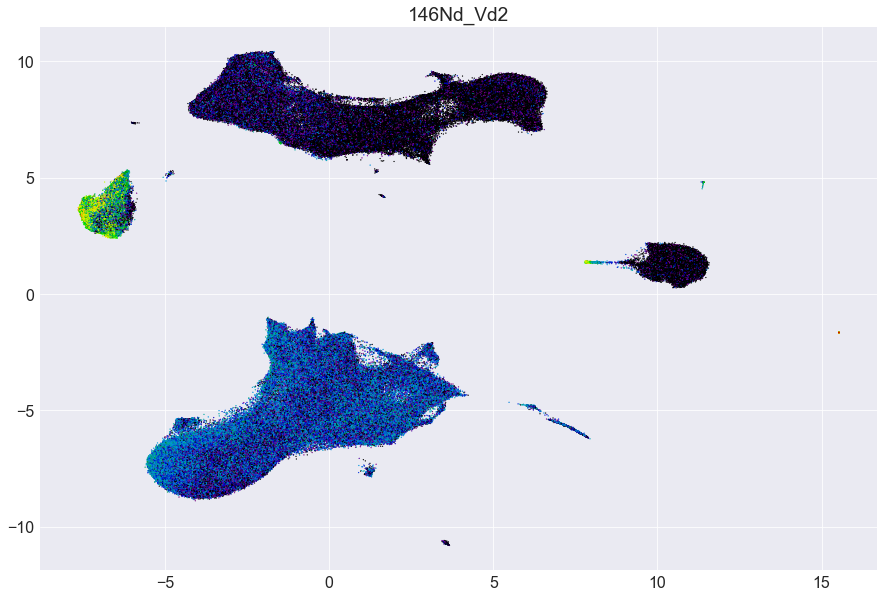

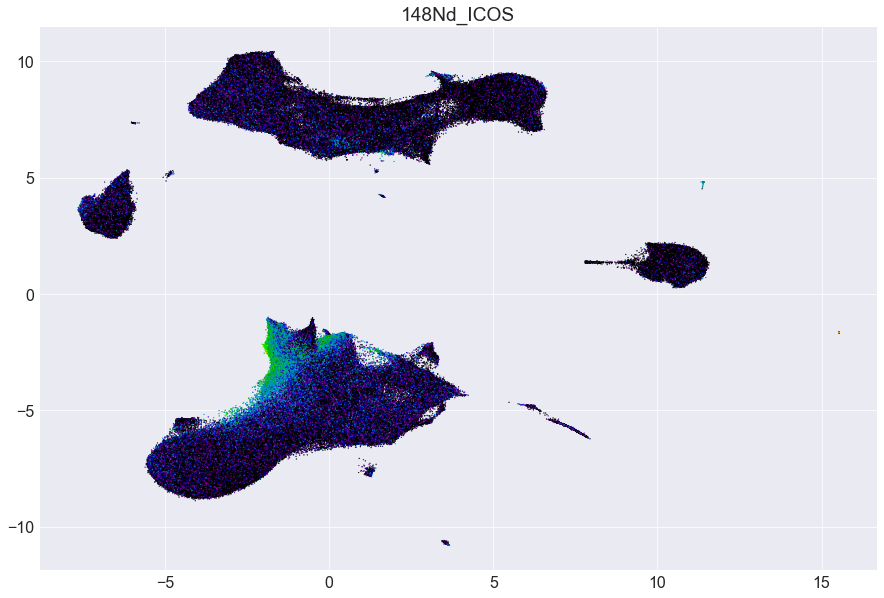

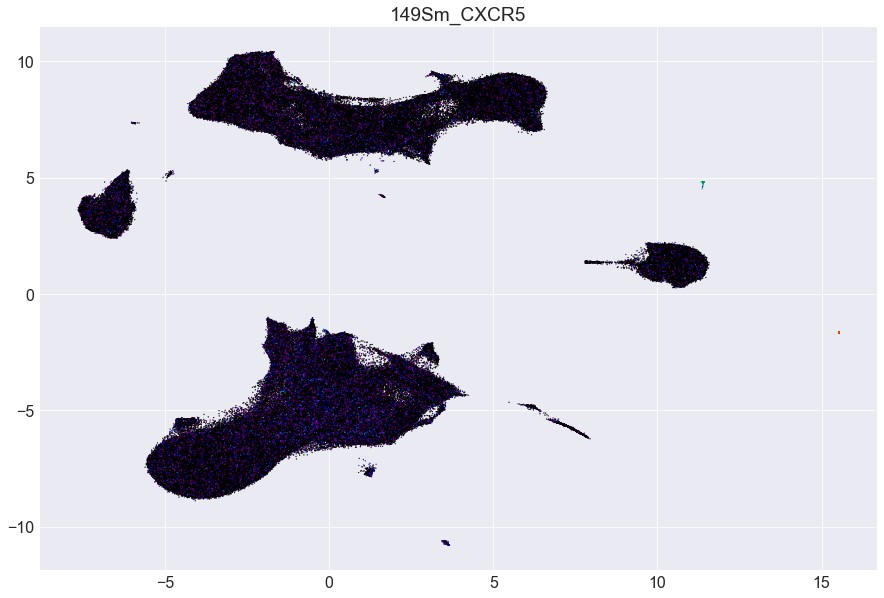

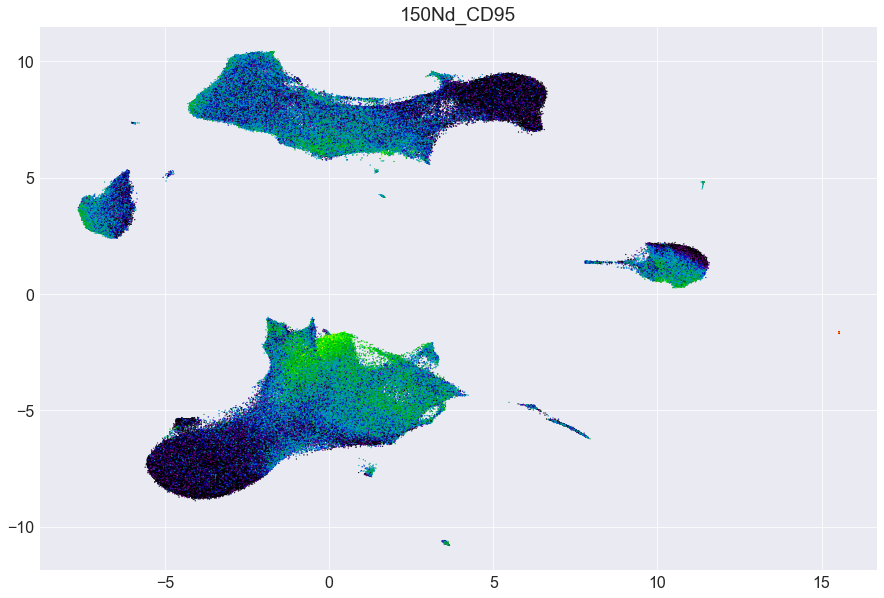

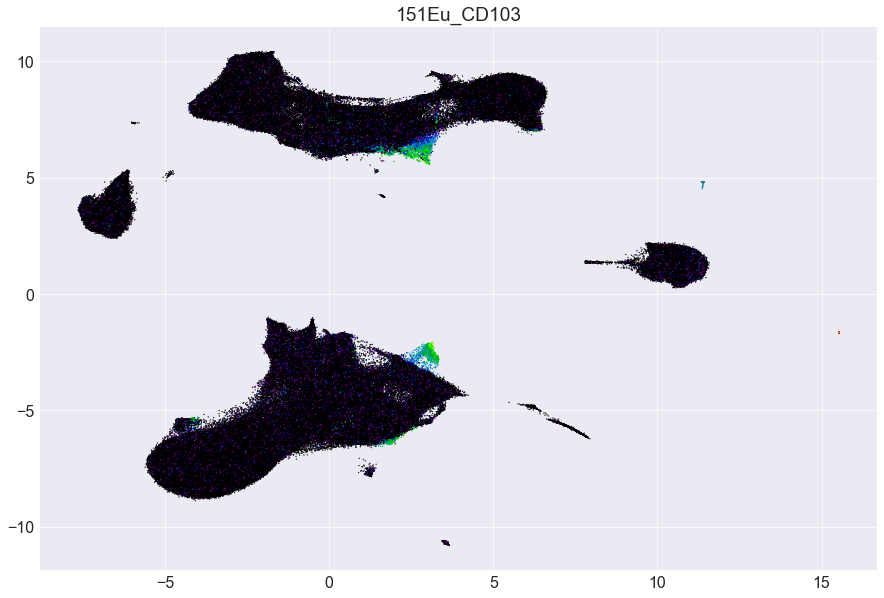

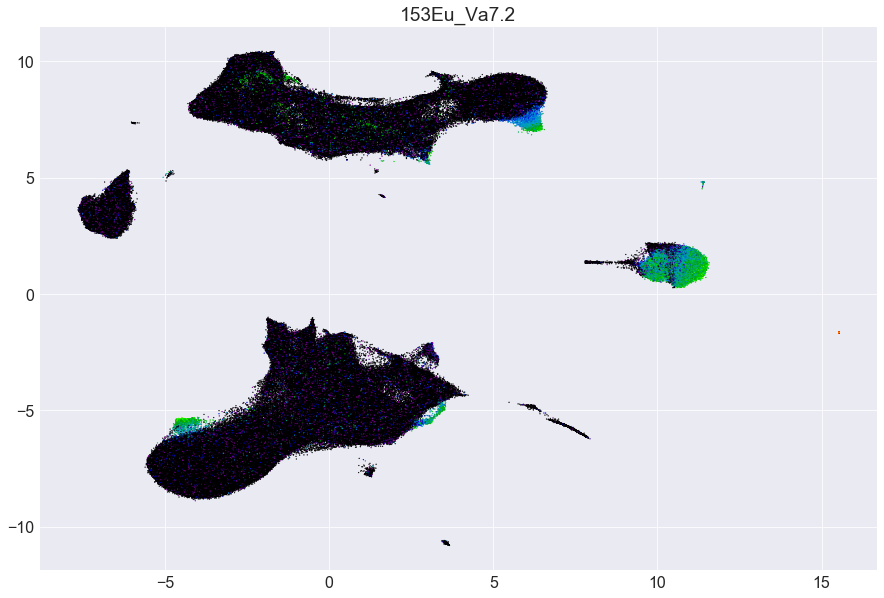

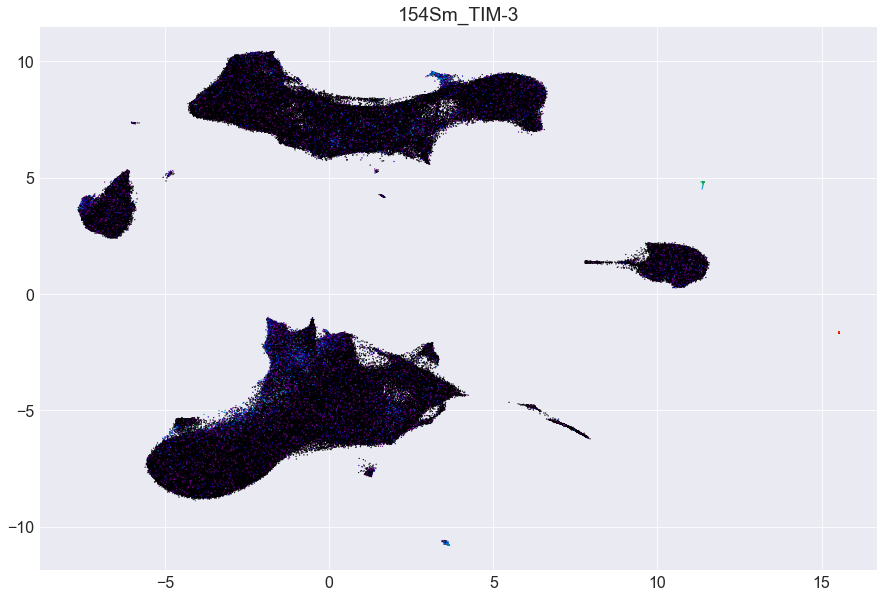

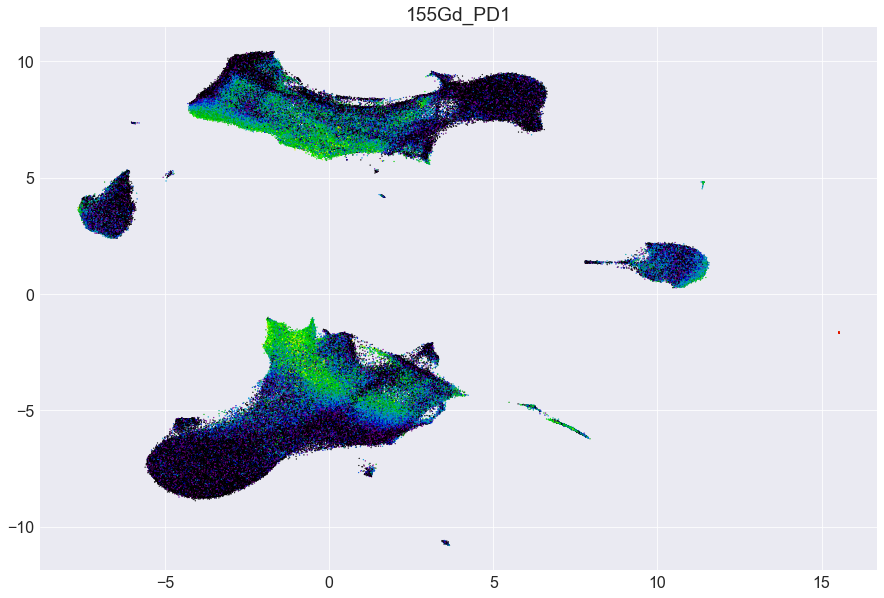

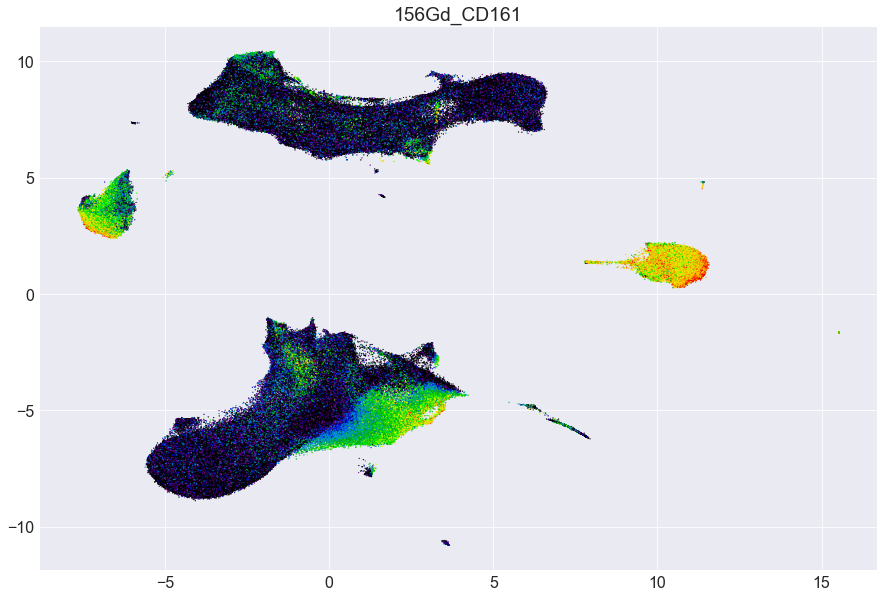

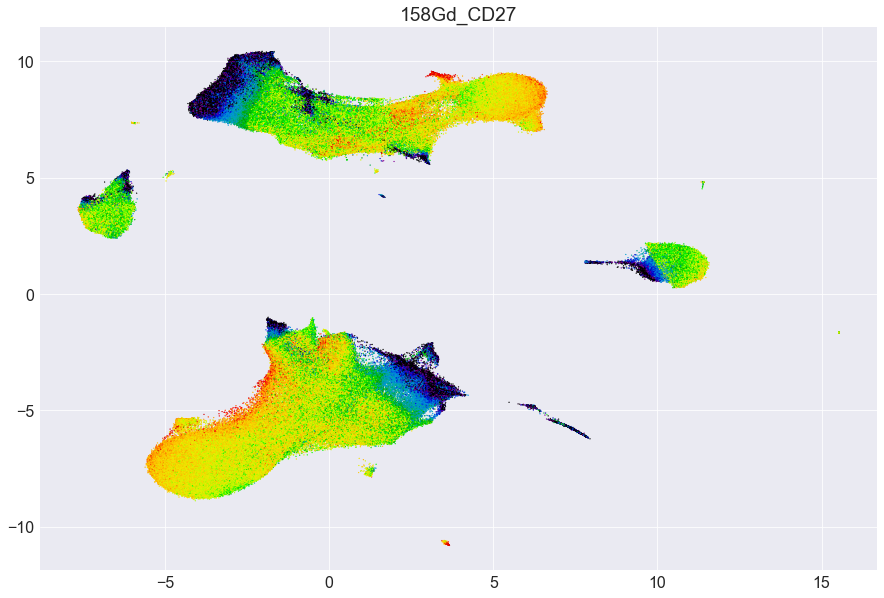

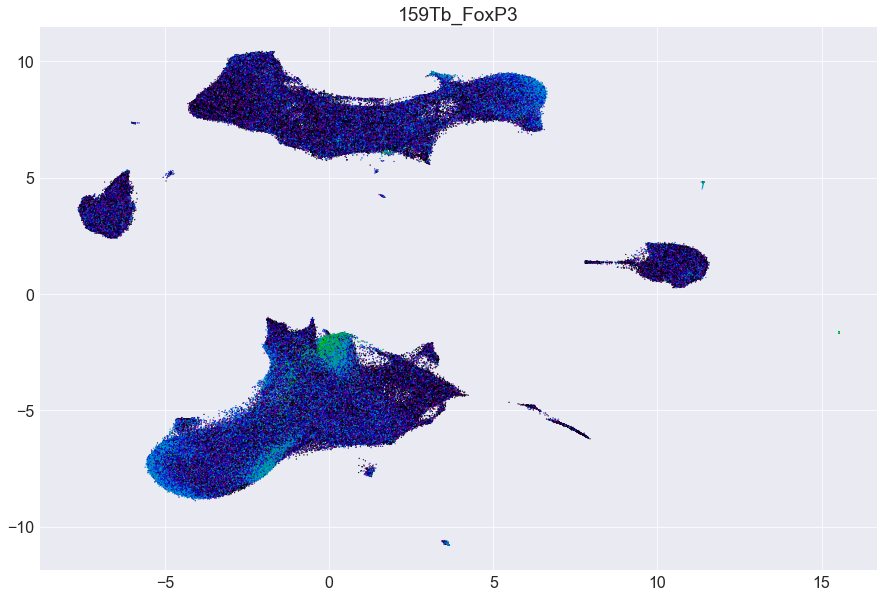

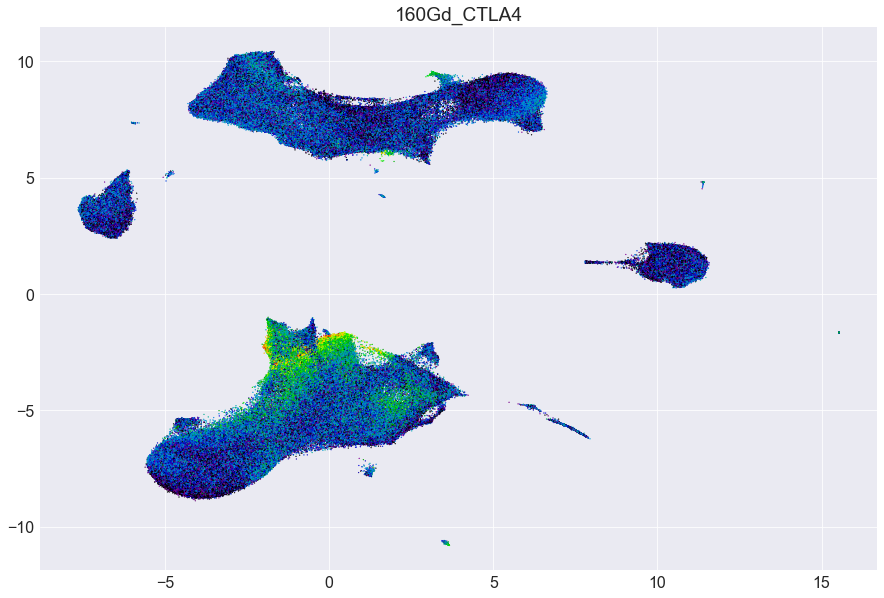

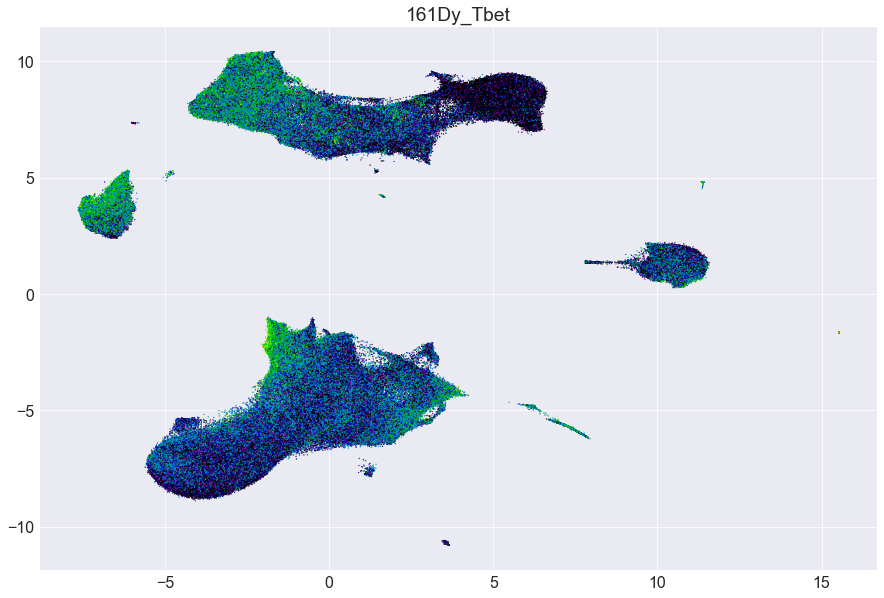

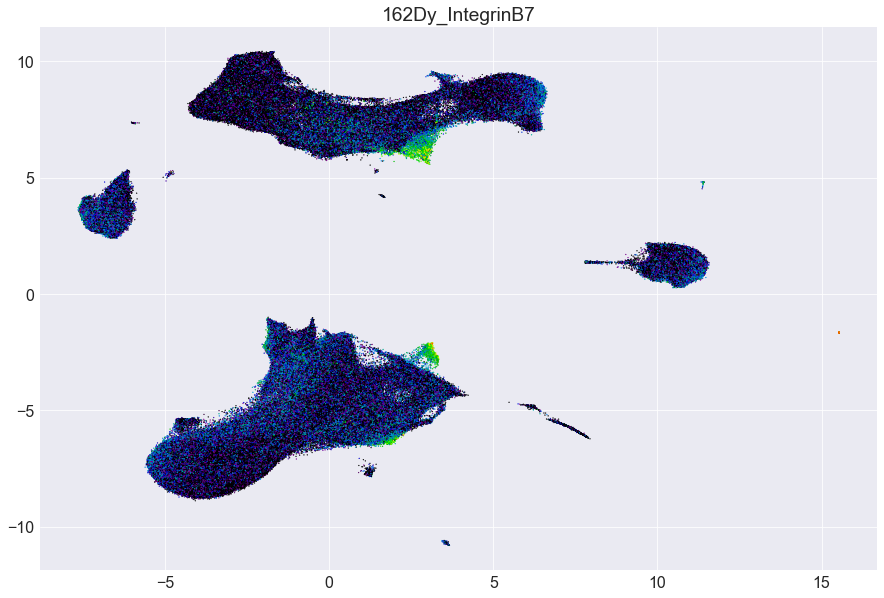

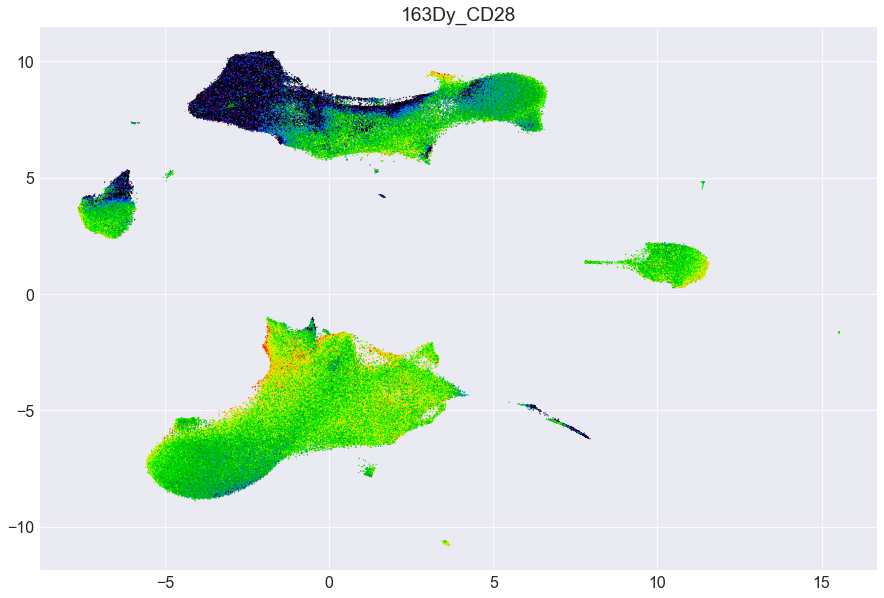

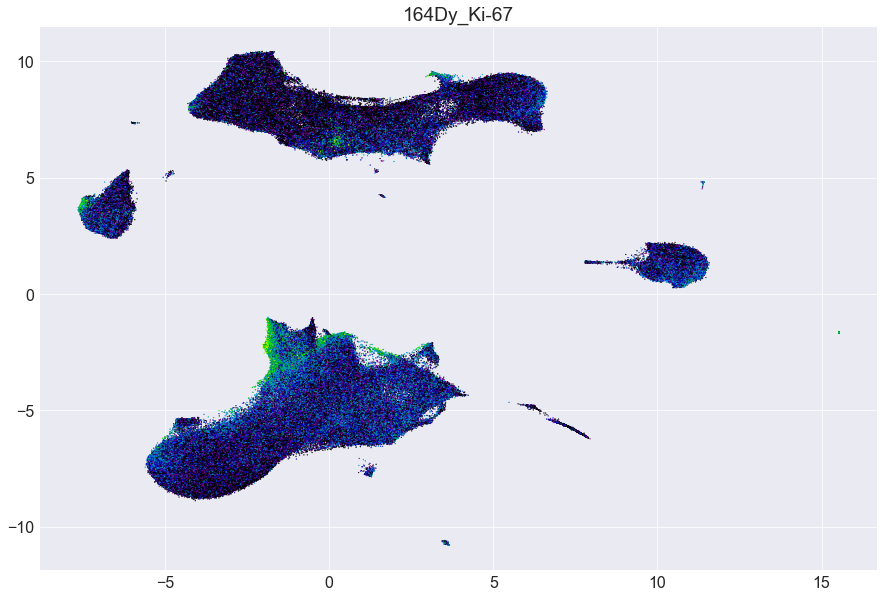

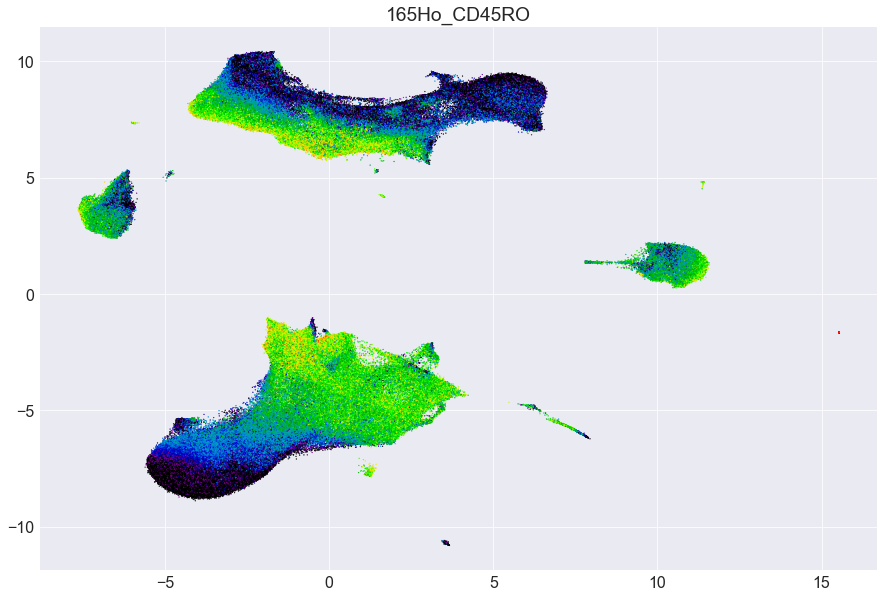

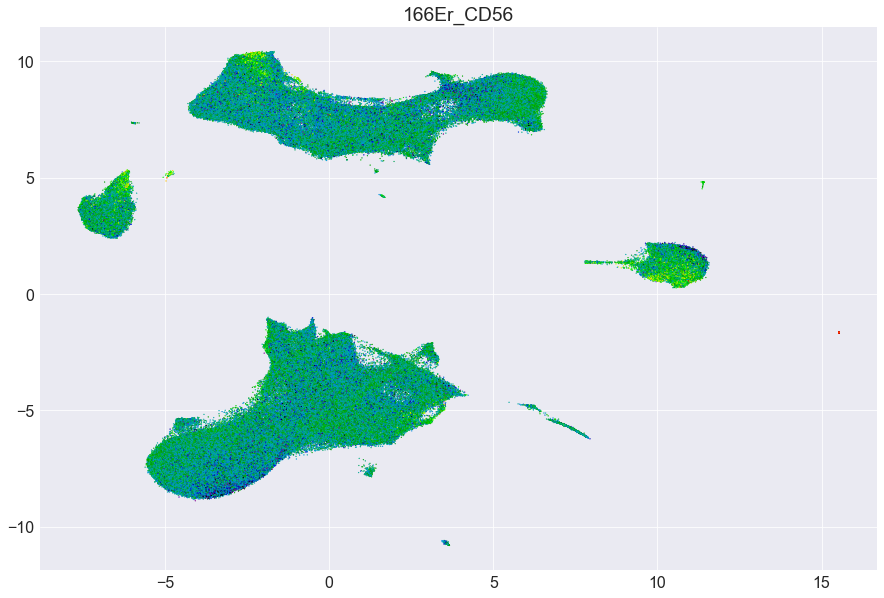

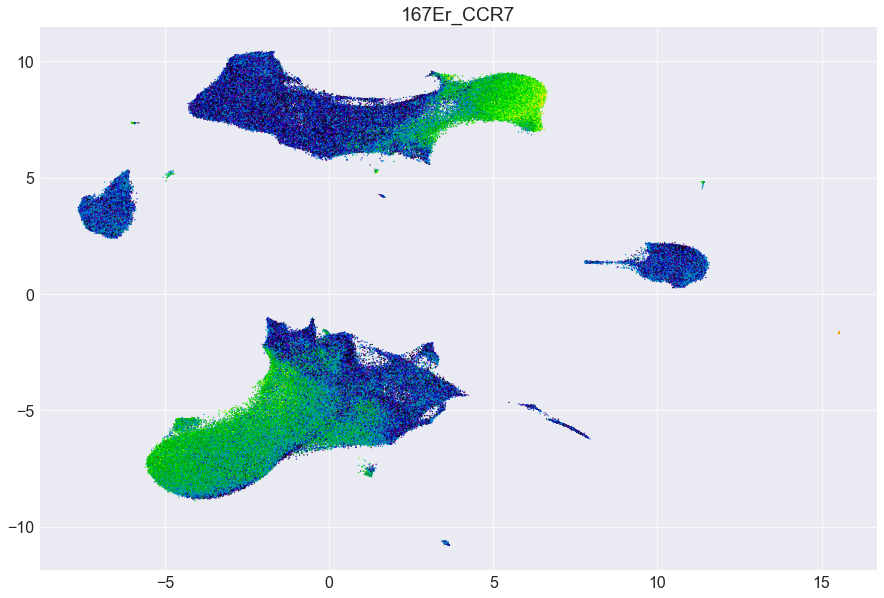

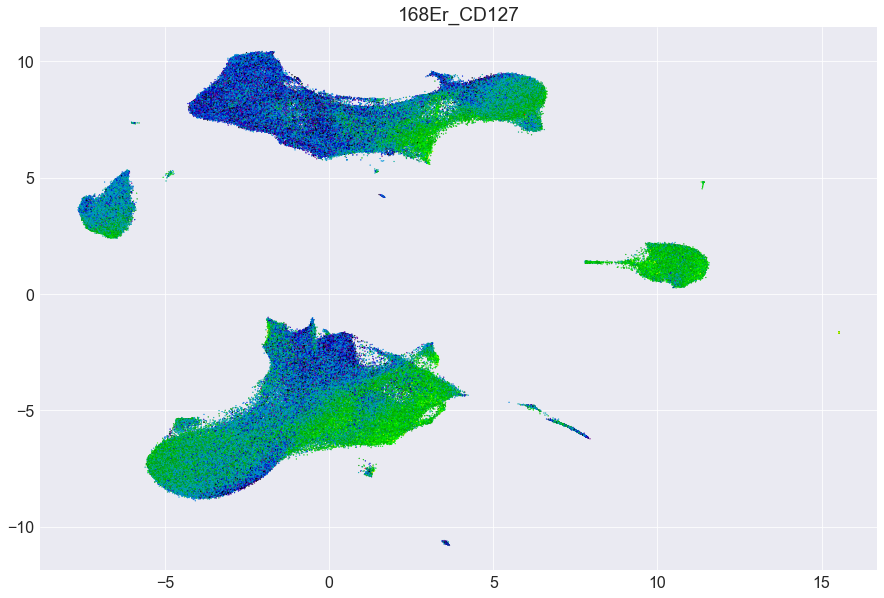

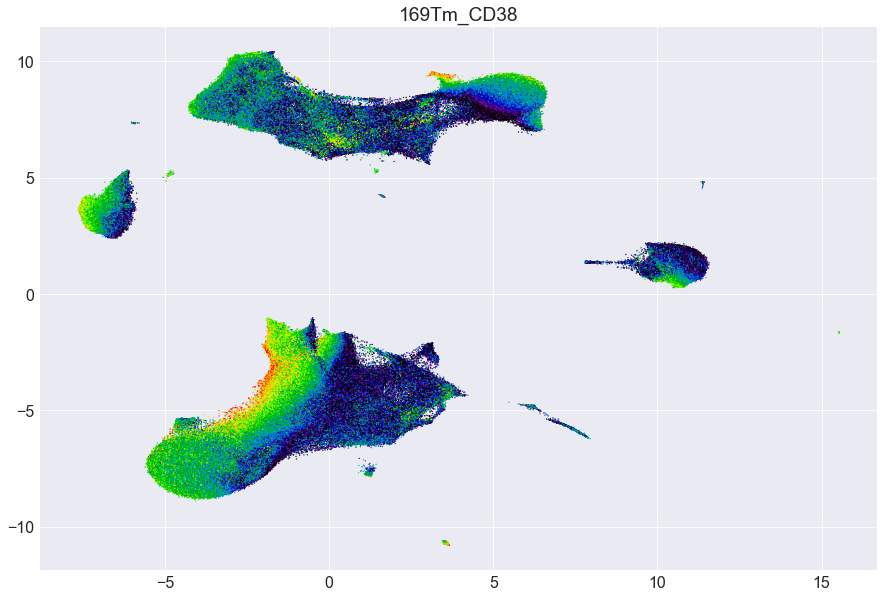

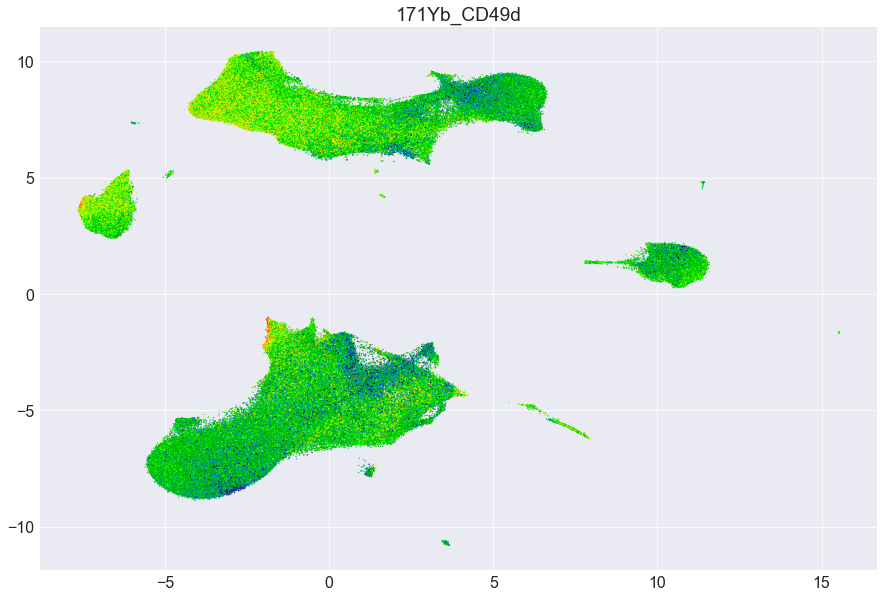

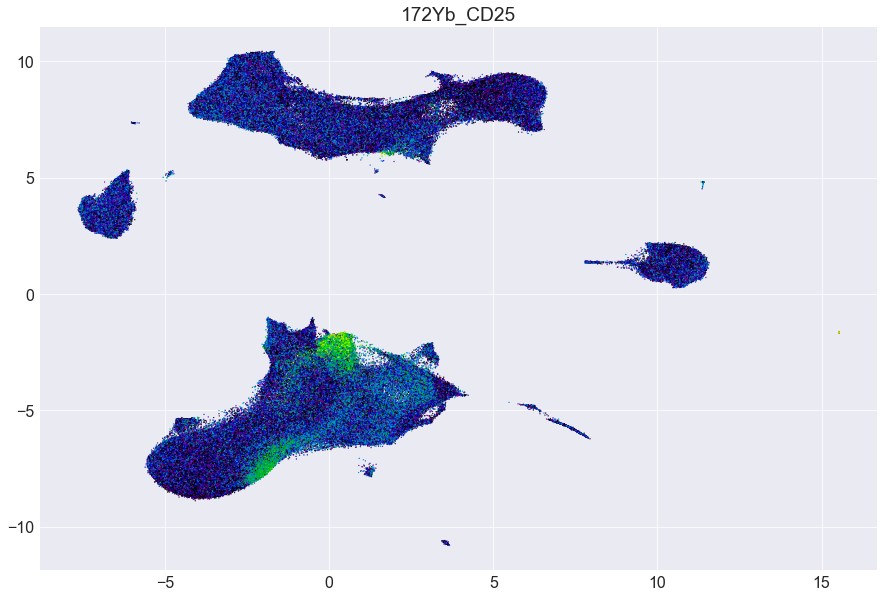

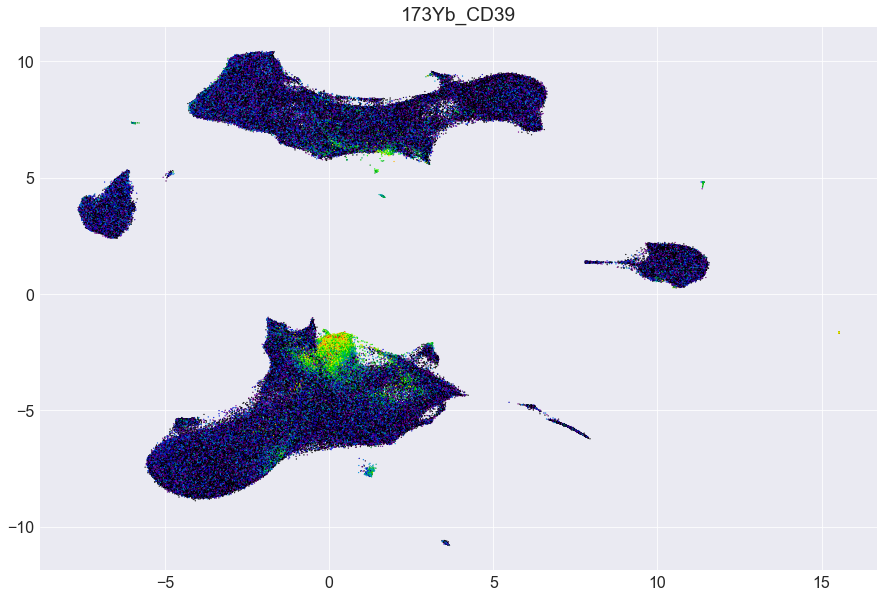

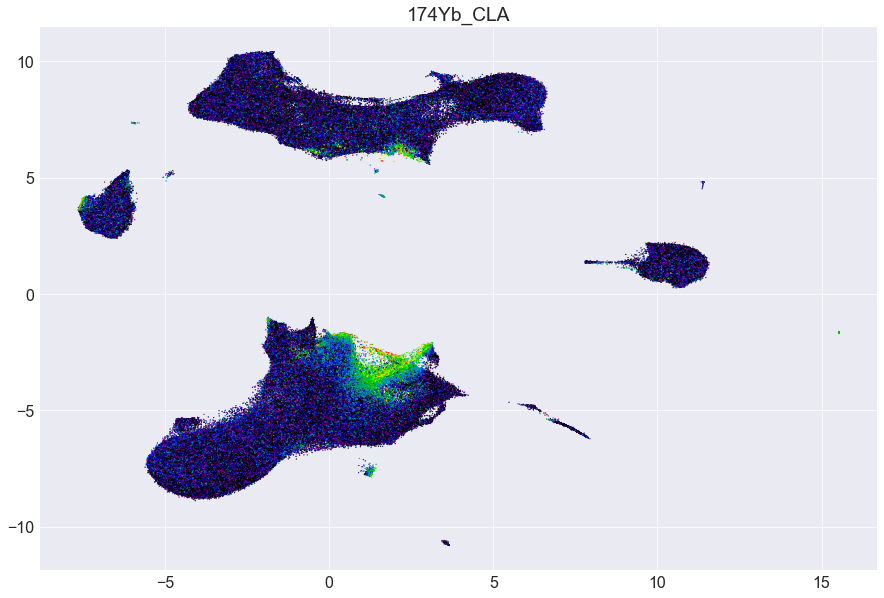

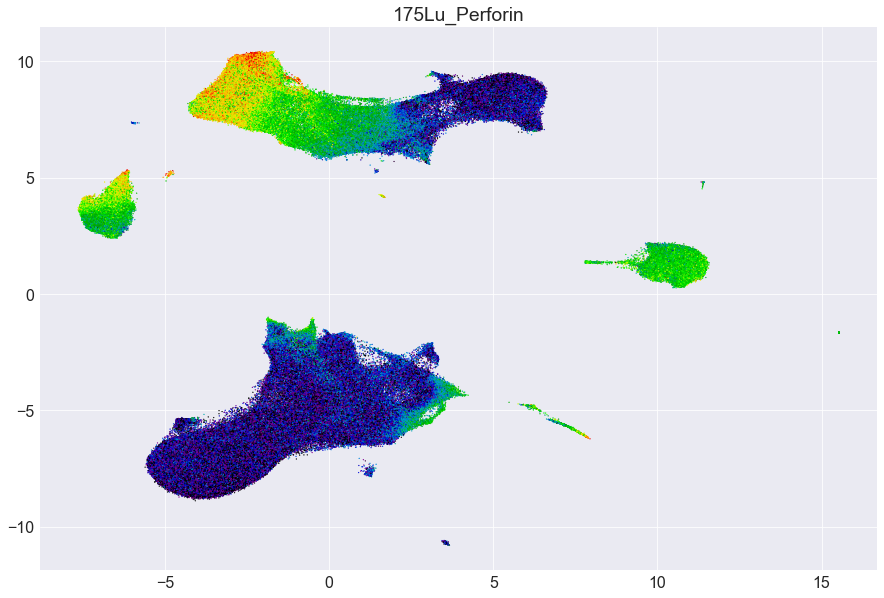

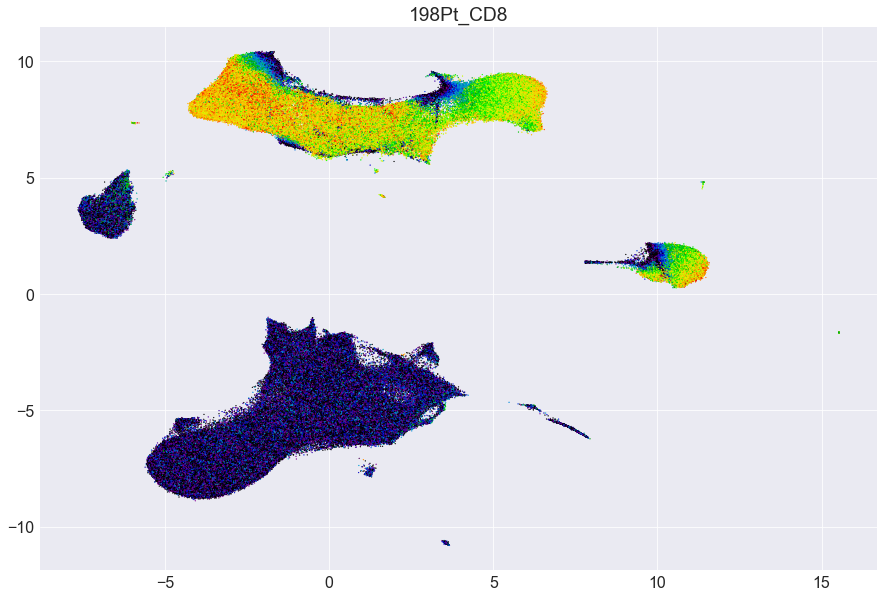

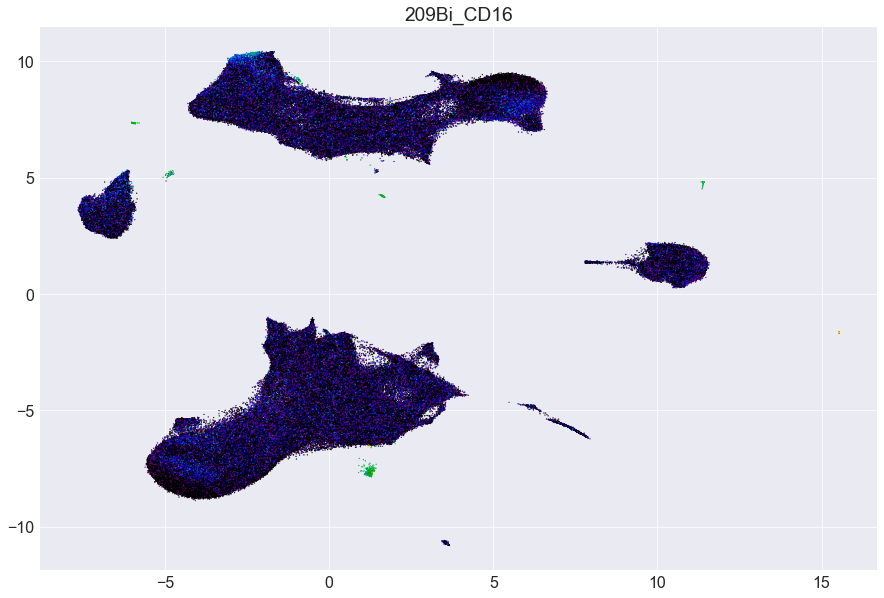

In [98]:
#######great
reducer = umap.UMAP(n_neighbors=20, min_dist=0.1, n_components=2, metric='euclidean')
%time embedding = reducer.fit_transform(big_boi.iloc[:, 1:35])
embedding.shape 
big_boi['umap1'] = embedding[:, 0]
big_boi['umap2'] = embedding[:,1]

channels=list(big_boi.columns.values)

for n in channels[0:35]:
    cmap=plt.get_cmap('nipy_spectral')
    fig=plt.figure(figsize=(15,10))
    ax=plt.subplot()
    ax.scatter(big_boi['umap1'], big_boi['umap2'], c=big_boi[n], cmap=cmap, s=1)
    plt.title('{}'.format(n))
    #plt.savefig('{}.pdf'.format(n))
    plt.show()

In [63]:
# tried but didn't look nice:

#(n_neighbors=15, min_dist=0.1, n_components=2, metric='euclidean')
#(n_neighbors=15, min_dist=0.2, n_components=2, metric='euclidean')
#(n_neighbors=20, min_dist=0.2, n_components=2, metric='euclidean')

# maybe try increasing nearest neighbor iteratively? makes sense that it would have to go up as
# a result of the much higher density in features conserved between people & timepoints

# ask irina about algorithm that finds good metaparameters


In [99]:
#print(np.unique(big_boi['id'])[0])
#maybs = big_boi.loc[big_boi['id'] == 'C+10_02_UMAP.csv']
#maybs.head(n=20)

C+10_02_UMAP.csv


Unnamed: 0  115In_CD57  141Pr_HLA-DR  142Nd_BCL-2  143Nd_CD45RA  \
228984       41602    0.000000      0.000000     3.935311      2.713579   
228985       41603    0.000000      0.000000     3.928290      1.653279   
228986       41604    0.000000      0.000000     3.280547      3.937355   
228987       41605    6.670011      0.000000     4.687460      4.526303   
228988       41606    0.000000      1.012880     3.522446      0.000000   
228989       41607    0.000000      0.000000     5.118576      0.145364   
228990       41608    5.810825      0.000000     3.944827      4.633459   
228991       41609    7.090389      0.000000     4.271693      4.200678   
228992       41610    0.000000      0.000000     3.524437      3.280108   
228993       41611    0.000000      0.000000     3.307719      1.808582   
228994       41612    0.000000      0.000000     4.209272      1.645129   
228995       41613    0.000000      0.000000     4.334081      4.399431   
228996       41614    0.000000      0.000000     4.549118      3.217820   
228997       41615    0.833054      0.000000     4.541667      2.894643   
228998       41616    0.000000      0.000000     3.246357      2.744779   
228999       41617    6.616857      1.321242     4.583064      4.580763   
229000       41618    4.306097      0.000000     3.815210      4.471703   
229001       41619    0.000000      0.000000     3.233580      3.190267   
229002       41620    0.000000      0.016013     4.900650      2.036425   
229003       41621    0.000000      2.030388     4.197967      0.727653   

        144Nd_GZB  145Nd_CD4  146Nd_Vd2  148Nd_ICOS  149Sm_CXCR5  \
228984   2.294961   5.226323   2.402305    0.556648     0.000000   
228985   0.000000   5.214157   1.598988    0.000000     1.749907   
228986   1.780693   4.887737   2.344482    0.000000     0.000000   
228987   6.770259   0.000000   1.226518    0.000000     0.000000   
228988   0.569018   5.137049   1.232675    1.223021     0.104393   
228989   0.390451   0.000000   0.207504    0.000000     0.000000   
228990   6.281823   4.475276   2.100314    1.374925     0.000000   
228991   6.365301   0.891432   0.000000    0.000000     0.000000   
228992   0.000000   0.000000   0.000000    0.000000     0.000000   
228993   0.240535   5.359190   2.092781    0.000000     0.850915   
228994   0.000000   5.009252   0.716818    1.739552     0.000000   
228995   0.000000   0.380783   0.000000    0.000000     0.000000   
228996   0.000000   5.552540   1.630839    0.000000     0.000000   
228997   1.931292   5.004816   0.417972    0.000000     0.000000   
228998   1.933608   4.901257   1.985625    0.000000     0.000000   
228999   6.852770   1.233149   0.709707    1.386395     0.000000   
229000   5.827122   3.157962   0.859388    0.000000     0.000000   
229001   0.000000   5.164777   1.837170    0.376646     0.000000   
229002   2.064460   5.319529   2.905207    0.676870     1.420269   
229003   2.568631   4.824194   2.398714    0.662993     0.000000   

              ...         172Yb_CD25  173Yb_CD39  174Yb_CLA  175Lu_Perforin  \
228984        ...           0.877445    0.827879   0.041487        1.215187   
228985        ...           0.701401    0.000000   1.406371        0.000000   
228986        ...           2.423846    1.633036   1.635920        1.488109   
228987        ...           0.605792    0.000000   2.066458        7.181400   
228988        ...           2.613971    0.158086   2.283521        0.000000   
228989        ...           0.638453    0.152510   1.732544        0.650463   
228990        ...           0.000000    0.000000   0.831452        6.011548   
228991        ...           0.453684    1.099886   1.039593        7.936172   
228992        ...           0.388075    0.045577   0.392367        3.090400   
228993        ...           3.674670    0.428482   0.000000        0.000000   
228994        ...           1.917916    0.000000   1.801387        2.052170   
228995        ...           1.102676    1.327407   1.71

In [103]:
os.chdir('/Users/s1249052/PhD/flow data/vac69a/t cells only/experiment_210618_files/csv_by_person/all/big_one')
for source in np.unique(big_boi['id']):
    new_df = pd.DataFrame()
    new_df = big_boi.loc[big_boi['id'] == source]
    new_df = new_df.drop(columns = ['id'])
    new_df = new_df.drop(columns = ['Unnamed: 0'])
    new_df = new_df.drop(columns = ['Timepoint'])                                   
    new_df.to_csv('{}'.format(source), sep=',') 
    
os.getcwd()

'/Users/s1249052/PhD/flow data/vac69a/t cells only/experiment_210618_files/csv_by_person/all/big_one'

In [101]:
print(big_boi.columns)

Index(['Unnamed: 0', '115In_CD57', '141Pr_HLA-DR', '142Nd_BCL-2',
       '143Nd_CD45RA', '144Nd_GZB', '145Nd_CD4', '146Nd_Vd2', '148Nd_ICOS',
       '149Sm_CXCR5', '150Nd_CD95', '151Eu_CD103', '153Eu_Va7.2',
       '154Sm_TIM-3', '155Gd_PD1', '156Gd_CD161', '158Gd_CD27', '159Tb_FoxP3',
       '160Gd_CTLA4', '161Dy_Tbet', '162Dy_IntegrinB7', '163Dy_CD28',
       '164Dy_Ki-67', '165Ho_CD45RO', '166Er_CD56', '167Er_CCR7',
       '168Er_CD127', '169Tm_CD38', '171Yb_CD49d', '172Yb_CD25', '173Yb_CD39',
       '174Yb_CLA', '175Lu_Perforin', '198Pt_CD8', '209Bi_CD16', 'Timepoint',
       'umap1', 'umap2', 'id'],
      dtype='object')


In [102]:
Baseline_csv = sub_concat[sub_concat['Timepoint'] == 'C-1']
C_10_csv = sub_concat[sub_concat['Timepoint'] == 'C+10']
C_12_csv = sub_concat[sub_concat['Timepoint'] == 'C+12']
DoD_csv = sub_concat[sub_concat['Timepoint'] == 'DoD']
T_6_csv = sub_concat[sub_concat['Timepoint'] == 'T+6']

Baseline_csv = Baseline_csv.drop(columns = ['Timepoint'])
C_10_csv = C_10_csv.drop(columns = ['Timepoint'])
C_12_csv = C_12_csv.drop(columns = ['Timepoint'])
DoD_csv = DoD_csv.drop(columns = ['Timepoint'])
T_6_csv = T_6_csv.drop(columns = ['Timepoint'])


NameError: name 'sub_concat' is not defined

In [ ]:
Baseline_csv.to_csv('baseline_09_UMAP.csv', sep=',') 
C_10_csv.to_csv('C+10_09_UMAP.csv', sep=',') 
C_12_csv.to_csv('C+12_09_UMAP.csv', sep=',') 
DoD_csv.to_csv('DoD_09_UMAP.csv', sep=',') 
T_6_csv.to_csv('T+6_09_UMAP.csv', sep=',') 

os.getcwd()